# Format files

In [19]:
! cat ../../Downloads/ml-1m/ratings.dat | awk -F "::" '{print $1","$2","$3}' > ../../Downloads/ml-1m/ratings_formatted.dat

# Train/Test Split

In [20]:
import random
import math

### Manual Split

In [22]:
with open("../../Downloads/ml-1m/ratings_formatted.dat") as f:
    data = f.read().split('\n')

In [23]:
len(data)

1000210

In [24]:
data[0]

'1,1193,5'

In [25]:
random.shuffle(data)

In [26]:
data[0]

'3153,2001,3'

In [27]:
1000210*.8

800168.0

In [28]:
train_data = data[:800168]
test_data = data[800168:]

In [29]:
len(train_data)

800168

In [30]:
len(test_data)

200042

In [35]:
with open('../../Downloads/ml-1m/ratings_train', 'w') as f:
    for item in train_data:
        f.write("{}\n".format(item))


In [36]:
with open('../../Downloads/ml-1m/ratings_test', 'w') as f:
    for item in test_data:
        f.write("{}\n".format(item))

In [33]:
! cat ../../Downloads/ml-1m/ratings_train.txt | head -n 1

3153,2001,3
cat: stdout: Broken pipe


In [34]:
! cat ../../Downloads/ml-1m/ratings_test.txt | head -n 1

1325,2395,4
cat: stdout: Broken pipe


### Train/Test split function

In [2]:
# function to split rows of file and save into train/test
def train_test_split(sourcefile, percentage_split):
    with open(sourcefile) as f:
        data = f.read().split('\n')
    
    total_lines = len(data)
    split_index = math.floor(total_lines*percentage_split)
    
    random.shuffle(data)
    
    train_data = data[:split_index]
    test_data = data[split_index:]
    
    with open('./ratings_train.txt', 'w') as f:
        for item in train_data:
            f.write("{}\n".format(item))
    
    with open('./ratings_test.txt', 'w') as f:
        for item in test_data:
            f.write("{}\n".format(item))
    
    print("{} with {} splitted at {}".format(sourcefile, total_lines, percentage_split))
    print("Train data: ratings_train.txt")
    print("Test data: ratings_test.txt")    

In [80]:
# scikitlearn API
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
train_test_split("/Users/jaimealmeida/capstone/data/ml-1m/ratings_filtered.dat", 0.8)

/Users/jaimealmeida/capstone/data/ml-1m/ratings_filtered.dat with 1000210 splitted at 0.8
Train data: ratings_train.txt
Test data: ratings_test.txt


> Input data in format User, Item, Rating, Date has been splited 80/20

## Import files to make sure there are no formatting inconsistencies

In [2]:
import pandas as pd

In [58]:
train = pd.read_csv("/Users/jaimealmeida/Repos/L2V_Sandbox/rmseNew/rmseconfig/trainset", header=None)

In [59]:
train.head()

,0,1,2
0,4732,220,1
1,4169,2653,4
2,5555,316,3
3,3128,913,5
4,3337,2949,4


In [36]:
train[2] = train[2].astype("Float64")

In [37]:
train.tail()

,0,1,2
800162,5153,34,4.0
800163,3528,724,3.0
800164,3231,2640,4.0
800165,3301,509,5.0
800166,4360,312,1.0


In [38]:
train.describe()

,0,1,2
count,800167.000000,800167.000000,800167.000000
mean,3025.517478,1864.333269,3.581024
std,1728.325489,1095.695959,1.117203
min,1.000000,1.000000,1.000000
25%,1505.000000,1029.000000,3.000000
50%,3074.000000,1834.000000,4.000000
75%,4477.000000,2770.000000,4.000000
max,6040.000000,3952.000000,5.000000


In [39]:
train.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800169 entries, 0 to 800168
Data columns (total 4 columns):
0    800168 non-null float64
1    800169 non-null int64
2    800169 non-null int64
3    800169 non-null float64
dtypes: float64(2), int64(2)
memory usage: 24.4 MB


In [54]:
train.to_csv("trainset3", index=False, header=None)

In [55]:
train2 = pd.read_csv("trainset3", header=None)

In [56]:
train2.head()

,0,1,2,3
0,0.0,1,2,3.0
1,NaN,0,1,2.0
2,0.0,4732,220,1.0
3,1.0,4169,2653,4.0
4,2.0,5555,316,3.0


In [53]:
! cat trainset | head -n 2

0,1,2,3
0.0,1,2,3.0
cat: stdout: Broken pipe


## Log Likelihood Ratio on Train Set

``` cat ratings.dat | awk -F "::" '{print $1", " $2", " $3}' > ratings_formatted.dat```

In [118]:
! cat ratings_train.txt | awk -F "::" '{print $1","$2","$3}' > ratings_train_formatted.txt

In [120]:
! cat ratings_train_formatted.txt | head -n 2

4268, 3700, 4
5055, 2951, 4
cat: stdout: Broken pipe


> The file above is then run with LLR module in Scala

In [121]:
# format test to be with the same format as train
! cat ratings_test.txt | awk -F "::" '{print $1", " $2", " $3}' > ratings_test_formatted.txt

## Remove edges based on threshold

```cat train_llr.txt | sed 's/(//g' | sed 's/)//g' > train_llr.csv```

In [4]:
cat ../../capstone/paper/ratings_train_llr/part-00000 | sed 's/(//g' | sed 's/)//g' > ../../capstone/paper/ratings_train_llr/train_llr_formatted

In [1]:
! cat xaa_formatted22222/part-00000 | sed 's/(//g' | sed 's/)//g' > 22222train_llr.csv

In [5]:
llr = pd.read_csv("../../capstone/paper/ratings_train_llr/train_llr_formatted", header=None, dtype={0: 'int64', 1: 'int64', 2: 'float64' })

In [6]:
llr.head()

,0,1,2
0,2266,339,0.807706
1,1133,5910,0.385269
2,4637,4274,0.526690
3,3892,1788,0.139026
4,2194,4315,0.353718


In [7]:
llr.shape

(15115784, 3)

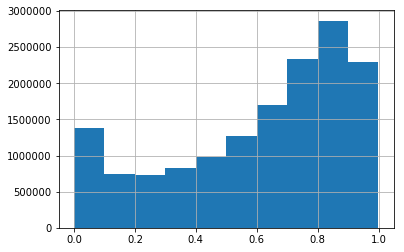

In [10]:
llr[2].hist();

In [11]:
threshold = 0.3

In [12]:
llr_threshold = llr[llr[2] >= threshold]

In [13]:
llr_threshold.shape

(12265052, 3)

In [14]:
llr_threshold.to_csv("../../capstone/paper/ratings_train_llr/train_llr_formatted_threshold", header=False, columns=[0, 1], index=False, sep='\t')

deepwalk --format edgelist --input ../../capstone/paper/ratings_train_llr/train_llr_formatted_threshold --number-walks 10 --output ../../capstone/paper/ratings_train_llr/user.embeddings --walk-length 10 --representation-size 100

In [15]:
! deepwalk --format edgelist --input ../../capstone/paper/ratings_train_llr/train_llr_formatted_threshold --number-walks 10 --output ../../capstone/paper/ratings_train_llr/user.embeddings --walk-length 10 --representation-size 100

Number of nodes: 5804
Number of walks: 58040
Data size (walks*length): 580400
Walking...
Training...
/Users/jaimealmeida/anaconda/lib/python3.6/site-packages/gensim/models/word2vec.py:406: UserWarning: Cython compilation failed, training will be slow. Do you have Cython installed? `pip install cython`
  warnings.warn("Cython compilation failed, training will be slow. Do you have Cython installed? `pip install cython`")


In [122]:
! cat train_llr.txt | sed 's/(//g' | sed 's/)//g' > train_llr.csv

In [ ]:
train_llr = pd.read_csv("train_llr.csv", header=None, dtype={0: 'int64', 1: 'int64', 2: 'float64' })

In [169]:
train_llr[train_llr.isnull().any(axis=1)]

,0,1,2
3643243,NaN,NaN,0.947631


In [173]:
train_llr[1] = train_llr[1].astype(int)

In [174]:
train_llr[0] = train_llr[0].astype(int)

In [175]:
train_llr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15042856 entries, 0 to 15042856
Data columns (total 3 columns):
0    int64
1    int64
2    float64
dtypes: float64(1), int64(2)
memory usage: 459.1 MB


In [170]:
train_llr = train_llr.dropna()

In [171]:
train_llr[train_llr.isnull().any(axis=1)]

,0,1,2


In [166]:
train_llr.shape

(15042857, 3)

In [176]:
train_llr.head()

,0,1,2
0,2266,339,0.888712
1,1133,5910,0.011634
2,4637,4274,0.028787
3,3892,1788,0.081020
4,2194,4315,0.454047


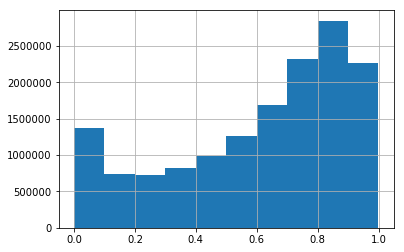

In [177]:
train_llr[2].hist();

In [10]:
threshold = 0.6 # values under threshold would be removed

In [179]:
train_llr_threshold = train_llr[train_llr[2] >= threshold]

In [183]:
train_llr_threshold.shape

(9129688, 3)

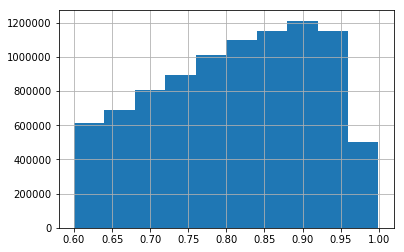

In [181]:
train_llr_threshold[2].hist();

In [184]:
# save output in format that can be used for DeepWalk python implementation
train_llr_threshold.to_csv("data/output/train_llr_threshold.csv", header=False, columns=[0, 1], index=False, sep='\t')

In [155]:
train_llr_threshold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9129689 entries, 0 to 15042856
Data columns (total 3 columns):
0    float64
1    float64
2    float64
dtypes: float64(3)
memory usage: 278.6 MB


In [172]:
train_llr_threshold[1] = train_llr_threshold[1].astype(int)

ValueError: Cannot convert NA to integer

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline

# Test with 10K entries

The file is formatted in bash, to remove parenthesis

``` cat quick10k.csv | sed 's/(//g' | sed 's/)//g' > quick10k_formatted.csv```

In [159]:
llr_output10k = pd.read_csv("data/output/quick10k_formatted.csv", header=None)

In [160]:
llr_output10k.shape

(10000, 3)

In [161]:
llr_output10k.head()

,0,1,2
0,289,3638,0.848318
1,393,3686,0.723820
2,5953,3112,0.866693
3,4414,3348,0.455875
4,4984,1623,0.466411


Look at distribution of LLR scores

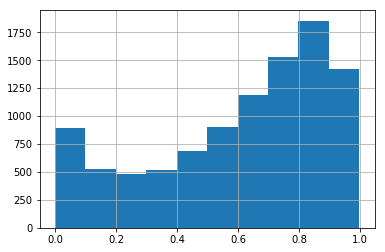

In [6]:
llr_output10k[2].hist();

In [14]:
threshold = 0.8 # values under threshold would be removed

In [15]:
llr_output10k_threshold = llr_output10k[llr_output10k[2] >= threshold]

In [16]:
llr_output10k_threshold.shape

(3247, 3)

> Close to 4K edges are removed

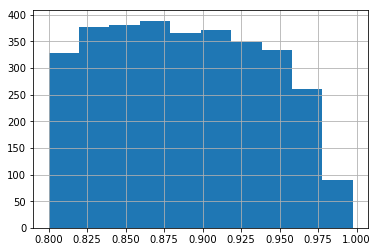

In [17]:
llr_output10k_threshold[2].hist();

In [18]:
llr_output10k_threshold.describe()

,0,1,2
count,3247.000000,3247.000000,3247.000000
mean,3011.496458,2986.758854,0.888422
std,1758.736571,1754.238022,0.051265
min,1.000000,1.000000,0.800018
25%,1462.000000,1438.500000,0.844680
50%,3047.000000,3017.000000,0.885973
75%,4530.000000,4512.000000,0.930956
max,6040.000000,6038.000000,0.997604


In [19]:
# save output in format that can be used for DeepWalk python implementation
llr_output10k_threshold.to_csv("data/output/llr_output10k_threshold.csv", header=False, columns=[0, 1], index=False, sep='\t')

In [20]:
# save output in format that can be used for DeepWalk Java implementation
llr_output10k_threshold.to_csv("data/output/llrjava.csv", header=False, columns=[0, 1, 2], index=False, sep=',')

### FInd unique vertices

In [57]:
all_users = np.union1d(llr_output10k_threshold[0], llr_output10k_threshold[1])

In [58]:
all_users.shape

(4700,)

## All data set
Will apply the same pre-processing to file containing all LLR scores

```cat part-00000 | sed 's/(//g' | sed 's/)//g' > part-00000_formatted.csv```

In [59]:
part00000 = pd.read_csv("data/output/part-00000_formatted.csv", header=None)

In [60]:
part00000.shape

(13330111, 3)

In [61]:
part00000.head()

,0,1,2
0,289,3638,0.848318
1,393,3686,0.723820
2,5953,3112,0.866693
3,4414,3348,0.455875
4,4984,1623,0.466411


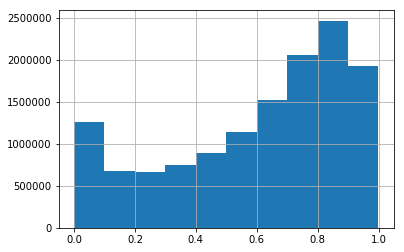

In [62]:
part00000[2].hist();

In [63]:
threshold = 0.6 # values under threshold would be removed

In [64]:
part00000_threshold = part00000[part00000[2] >= threshold]

In [65]:
part00000_threshold.shape

(7959213, 3)

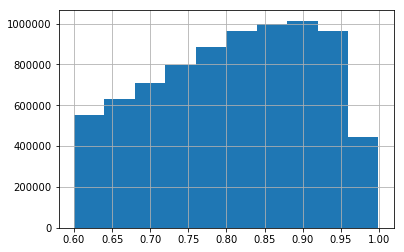

In [66]:
part00000_threshold[2].hist();

In [47]:
part00000_threshold.to_csv("data/output/part00000_threshold.csv", header=False, columns=[0, 1], index=False, sep='\t')

In [67]:
part00000_threshold.to_csv("data/output/part00000_threshold_weights.csv", header=False, columns=[0, 1, 2], index=False, sep=',')

## Embeddings

```deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/data/output/part00000_threshold.csv --number-walks 10 --output /Users/jaimealmeida/Repos/l2v/data/output/part00000_threshold.embeddings --walk-length 10 --representation-size 100```

Number of nodes: 5639      
Number of walks: 56390       
Data size (walks*length): 563900    
Walking...   
Training..     

In [56]:
embeddings = pd.read_csv("data/output/part00000_threshold.embeddings", skiprows=[0], header=None, sep=' ')

In [57]:
embeddings.shape

(5639, 101)

In [58]:
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,4950,0.029411,-0.029011,0.030342,0.007137,0.020240,-0.001895,-0.006940,-0.045064,-0.011115,...,0.006787,-0.006308,-0.016844,0.004014,-0.014748,-0.036794,-0.013607,-0.041849,-0.022406,-0.036598
1,5539,0.017118,-0.019020,0.035118,0.001949,0.002670,0.021218,0.007540,-0.060382,0.013636,...,0.016347,-0.021389,-0.016782,-0.016390,-0.012767,-0.059798,0.012339,-0.061959,-0.027567,-0.034974
2,2020,0.013364,-0.045871,0.027574,0.007143,0.028880,-0.002263,0.008852,-0.051995,-0.012710,...,-0.004698,-0.007786,-0.020610,-0.012364,-0.004817,-0.039080,0.000911,-0.055822,-0.019091,-0.033684
3,4958,0.005615,-0.011613,-0.000398,0.007768,0.018303,-0.004873,0.011256,-0.030620,0.009395,...,0.004837,-0.012773,-0.018486,-0.009675,0.007834,-0.010578,0.016816,-0.030405,-0.007841,-0.014204
4,1842,0.018154,-0.026671,0.026202,0.013188,0.013489,0.012235,0.006163,-0.058092,0.005688,...,0.005404,-0.024490,-0.020467,-0.020339,-0.012503,-0.041725,0.004853,-0.054272,-0.037077,-0.024752


## Embeddings - parameters

In [17]:
embeddingSize = [ i for i in range(100, 600, 100)]
walk_length = [10, 25,50]
number_of_walks = [10, 25, 50]

In [18]:
embeddingSize

[100, 200, 300, 400, 500]

In [19]:
params = zip(embeddingSize, walk_length, number_of_walks)
list(params)

[(100, 10, 10), (200, 25, 25), (300, 50, 50)]

In [20]:
import itertools

In [21]:
combs = itertools.product(embeddingSize,walk_length, number_of_walks)

In [22]:
hyperparams = list(combs)

In [23]:
len(hyperparams)

45

In [24]:
hyperparams[:10]

[(100, 10, 10),
 (100, 10, 25),
 (100, 10, 50),
 (100, 25, 10),
 (100, 25, 25),
 (100, 25, 50),
 (100, 50, 10),
 (100, 50, 25),
 (100, 50, 50),
 (200, 10, 10)]

In [25]:
subset = []
for i, hyp in enumerate(hyperparams):
    if i % 8 == 0:
        subset.append(hyp)    

In [26]:
subset

[(100, 10, 10),
 (100, 50, 50),
 (200, 50, 25),
 (300, 50, 10),
 (400, 25, 50),
 (500, 25, 25)]

In [27]:
command = "deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold.csv --number-walks {} --output /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold{}.embeddings --walk-length {} --representation-size {}"

In [28]:
command2 = "deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/xaa_formatted22222/train_llr_threshold --number-walks {} --output /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold{}.embeddings --walk-length {} --representation-size {} --workers 8"

In [150]:
test = subset[0]
test

(100, 10, 10)

In [151]:
test[1]

10

In [152]:
command.format(test[2], str(test[2]) + "-" + str(test[1]) + "-" + str(test[0]), test[1], test[0])

'deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold.csv --number-walks 10 --output /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold10-10-100.embeddings --walk-length 10 --representation-size 100'

In [153]:
for s in subset:
    print("Hyperparameters: {}".format(s))
    print(command.format(s[2], str(s[2]) + "-" + str(s[1]) + "-" + str(s[0]), s[1], s[0]))
    print("-----------")

Hyperparameters: (100, 10, 10)
deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold.csv --number-walks 10 --output /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold10-10-100.embeddings --walk-length 10 --representation-size 100
-----------
Hyperparameters: (100, 50, 50)
deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold.csv --number-walks 50 --output /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold50-50-100.embeddings --walk-length 50 --representation-size 100
-----------
Hyperparameters: (200, 50, 25)
deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold.csv --number-walks 25 --output /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold25-50-200.embeddings --walk-length 50 --representation-size 200
-----------
Hyperparameters: (300, 50, 10)
deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/data/output/trai

In [29]:
for s in subset:
    print("Hyperparameters: {}".format(s))
    print(command2.format(s[2], str(s[2]) + "-" + str(s[1]) + "-" + str(s[0]), s[1], s[0]))
    print("-----------")

Hyperparameters: (100, 10, 10)
deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/xaa_formatted22222/train_llr_threshold --number-walks 10 --output /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold10-10-100.embeddings --walk-length 10 --representation-size 100 --workers 8
-----------
Hyperparameters: (100, 50, 50)
deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/xaa_formatted22222/train_llr_threshold --number-walks 50 --output /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold50-50-100.embeddings --walk-length 50 --representation-size 100 --workers 8
-----------
Hyperparameters: (200, 50, 25)
deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/xaa_formatted22222/train_llr_threshold --number-walks 25 --output /Users/jaimealmeida/Repos/l2v/data/output/train_llr_threshold25-50-200.embeddings --walk-length 50 --representation-size 200 --workers 8
-----------
Hyperparameters: (300, 50, 10)
deepwalk --format edgelist --input /

In [71]:
import subprocess

subprocess.check_call(['/Users/jaimealmeida/Repos/deepwalk/deepwalk', '--input /Users/jaimealmeida/Repos/deepwalk/example_graphs/example_graphs/karate.adjlist', '--output /Users/jaimealmeida/Repos/deepwalk/example_graphs/karate2.embeddings'])

PermissionError: [Errno 13] Permission denied

In [72]:
import subprocess

In [74]:
subprocess.call(["pwd"])

0

$deepwalk --format edgelist --input [LLR_output] --number-walks [] --representation-size [] --walk-length [] --window-size

```
usage: deepwalk [-h] [--debug] [--format FORMAT] --input [INPUT] [-l LOG]
                [--matfile-variable-name MATFILE_VARIABLE_NAME]
                [--max-memory-data-size MAX_MEMORY_DATA_SIZE]
                [--number-walks NUMBER_WALKS] --output OUTPUT
                [--representation-size REPRESENTATION_SIZE] [--seed SEED]
                [--undirected UNDIRECTED] [--vertex-freq-degree]
                [--walk-length WALK_LENGTH] [--window-size WINDOW_SIZE]
                [--workers WORKERS]

optional arguments:
  -h, --help            show this help message and exit
  --debug               drop a debugger if an exception is raised. (default:
                        False)
  --format FORMAT       File format of input file (default: adjlist)
  --input [INPUT]       Input graph file (default: None)
  -l LOG, --log LOG     log verbosity level (default: INFO)
  --matfile-variable-name MATFILE_VARIABLE_NAME
                        variable name of adjacency matrix inside a .mat file.
                        (default: network)
  --max-memory-data-size MAX_MEMORY_DATA_SIZE
                        Size to start dumping walks to disk, instead of
                        keeping them in memory. (default: 1000000000)
  --number-walks NUMBER_WALKS
                        Number of random walks to start at each node (default:
                        10)
  --output OUTPUT       Output representation file (default: None)
  --representation-size REPRESENTATION_SIZE
                        Number of latent dimensions to learn for each node.
                        (default: 64)
  --seed SEED           Seed for random walk generator. (default: 0)
  --undirected UNDIRECTED
                        Treat graph as undirected. (default: True)
  --vertex-freq-degree  Use vertex degree to estimate the frequency of nodes
                        in the random walks. This option is faster than
                        calculating the vocabulary. (default: False)
  --walk-length WALK_LENGTH
                        Length of the random walk started at each node
                        (default: 40)
  --window-size WINDOW_SIZE
                        Window size of skipgram model. (default: 5)
  --workers WORKERS     Number of parallel processes. (default: 1)```

## Graphing embeddings

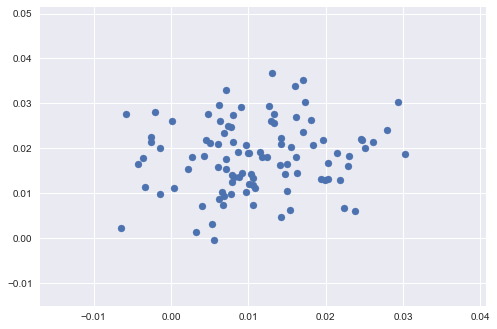

In [67]:
import matplotlib.pyplot as plt

# Plot 100 users in one dimmension
plt.scatter(embeddings[1][:100,], embeddings[3][:100,]);

In [ ]:
# Looking into T-SNE for a filtered representation to consider all dims but only showing users relevant to KNN calculation

## Filtering Item LLR scores

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

```cat part-00000 | sed 's/(//g' | sed 's/)//g' > part-00000_formatted.csv```

In [3]:
! cat xaa_formatted22222-items/part-00000 | sed 's/(//g' | sed 's/)//g' > items_train_llr.csv

In [4]:
! cat xaa_formatted22222-items/items_train_llr.csv | head -n 1

cat: xaa_formatted22222-items/items_train_llr.csv: No such file or directory


In [7]:
part00000 = pd.read_csv("/Users/jaimealmeida/Repos/l2v/xaa_formatted22222-items/items_train_llr.csv", header=None)

In [13]:
part00000.shape

(5505748, 3)

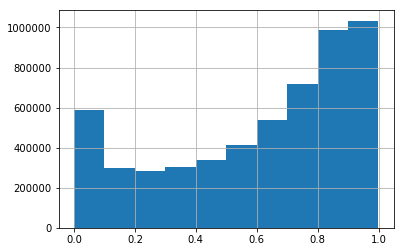

In [12]:
part00000[2].hist();

In [11]:
threshold = 0.6 # values under threshold would be removed

In [14]:
part00000_threshold = part00000[part00000[2] >= threshold]

In [15]:
part00000_threshold.shape

(3276298, 3)

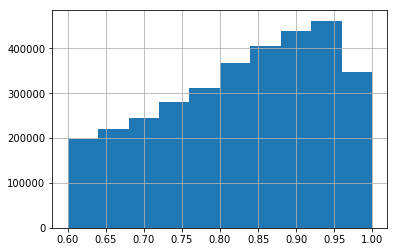

In [17]:
part00000_threshold[2].hist();

In [18]:
part00000_threshold.to_csv("/Users/jaimealmeida/Repos/l2v/xaa_formatted22222-items/part00000_threshold.csv", header=False, columns=[0, 1], index=False, sep='\t')

## LLR_OUTPUT - Ml-1m - 001-4-12-17/part-00000

output needs to be cleanup

In [41]:
! pwd

/Users/jaimealmeida/Repos/l2v


In [42]:
! cat ./data/llr_output/ml-1m/001-4-12-17/part-00000 | sed 's/(//g' | sed 's/)//g' > ./data/llr_output/ml-1m/001-4-12-17/formatted/part-00000_formatted

In [43]:
train = pd.read_csv("./data/llr_output/ml-1m/001-4-12-17/formatted/part-00000_formatted", header=None)

In [44]:
train.head()

,0,1,2
0,2750,3442,0.415529
1,2708,509,0.894144
2,393,3686,0.923577
3,882,1366,0.817129
4,3491,1769,0.392324


In [46]:
train.shape

(5277183, 3)

In [45]:
threshold = 0.6 # values under threshold would be removed


In [47]:
train_threshold = train[train[2] >= threshold]

In [48]:
train_threshold.shape

(3286105, 3)

In [49]:
train_threshold.to_csv("./data/llr_output/ml-1m/001-4-12-17/formatted/part-00000_formatted_threshold", header=False, columns=[0, 1], index=False, sep='\t')

In [50]:
! cat ./data/llr_output/ml-1m/001-4-12-17/formatted/part-00000_formatted_threshold | head -n 1

2708	509
cat: stdout: Broken pipe
